# Machine Learning Model which can identify the deaths and recovered cases in Covid-19

In [127]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [94]:
#acquiring the data
Covid_df=pd.read_csv("covid.csv")

In [95]:
#previewing the data
Covid_df.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [96]:
#checking the structure of the dataset
Covid_df.shape

(58, 18)

In [97]:
#checking the structure of the dataset
Covid_df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [98]:
Covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [99]:
Covid_df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [100]:
#imputer functions(handling null values)
Covid_df['Recovered'].fillna(Covid_df['Recovered'].mean(),inplace=True)
Covid_df['Incident_Rate'].fillna(Covid_df['Incident_Rate'].mean(),inplace=True)
Covid_df['People_Tested'].fillna(Covid_df['People_Tested'].mean(),inplace=True)
Covid_df['People_Hospitalized'].fillna(Covid_df['People_Hospitalized'].mean(),inplace=True)
Covid_df['Mortality_Rate'].fillna(Covid_df['Mortality_Rate'].mode(),inplace=True)
Covid_df['Hospitalization_Rate'].fillna(Covid_df['Hospitalization_Rate'].mean(),inplace=True)

In [101]:
Covid_df['Testing_Rate'].fillna(Covid_df['Testing_Rate'].mean(),inplace=True)

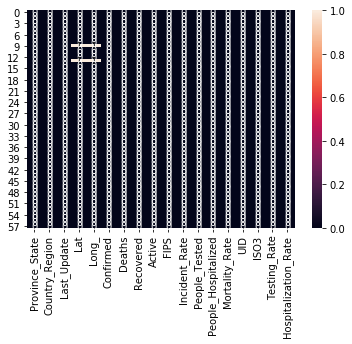

In [102]:
#visualizing the null values through heatmap
sns.heatmap(Covid_df.isnull(),annot=True)

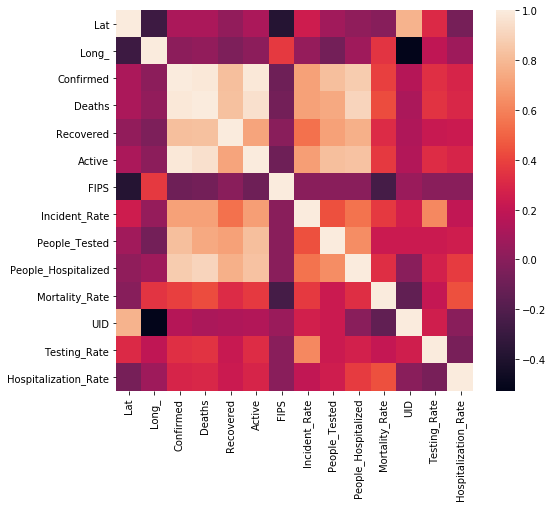

In [103]:
#checking for the correlation
corr_hmap=Covid_df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap)

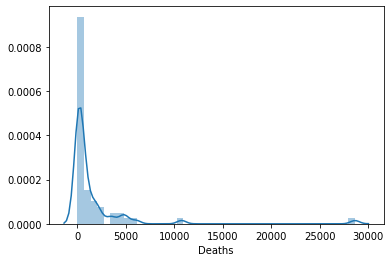

In [104]:
sns.distplot(Covid_df['Deaths'])

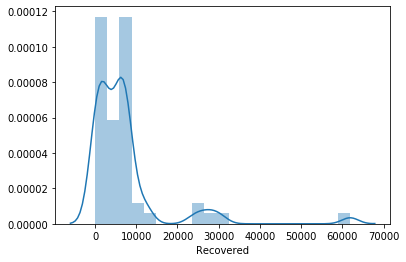

In [105]:
sns.distplot(Covid_df['Recovered'])

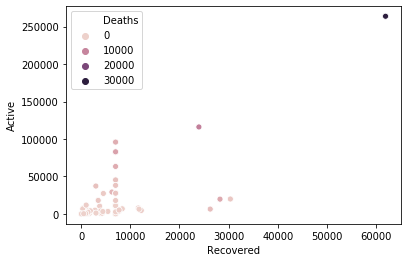

In [106]:
sns.scatterplot(x='Recovered', y='Active',data=Covid_df,hue='Deaths',markers=True)

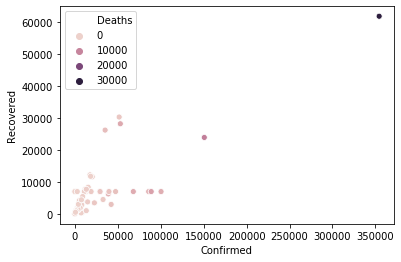

In [107]:
sns.scatterplot(x='Confirmed', y='Recovered',data=Covid_df,hue='Deaths',markers=True)

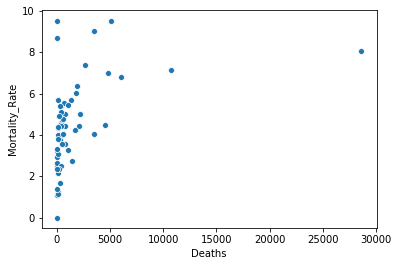

In [108]:
sns.scatterplot(x='Deaths', y='Mortality_Rate',data=Covid_df)

Lat                        AxesSubplot(0.125,0.749828;0.168478x0.130172)
Long_                   AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Confirmed               AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Deaths                  AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Recovered                  AxesSubplot(0.125,0.593621;0.168478x0.130172)
Active                  AxesSubplot(0.327174,0.593621;0.168478x0.130172)
FIPS                    AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Incident_Rate           AxesSubplot(0.731522,0.593621;0.168478x0.130172)
People_Tested              AxesSubplot(0.125,0.437414;0.168478x0.130172)
People_Hospitalized     AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Mortality_Rate          AxesSubplot(0.529348,0.437414;0.168478x0.130172)
UID                     AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Testing_Rate               AxesSubplot(0.125,0.281207;0.168478x0.130172)
Hospitalization_Rate    AxesSubplot(0.327174,0.2812

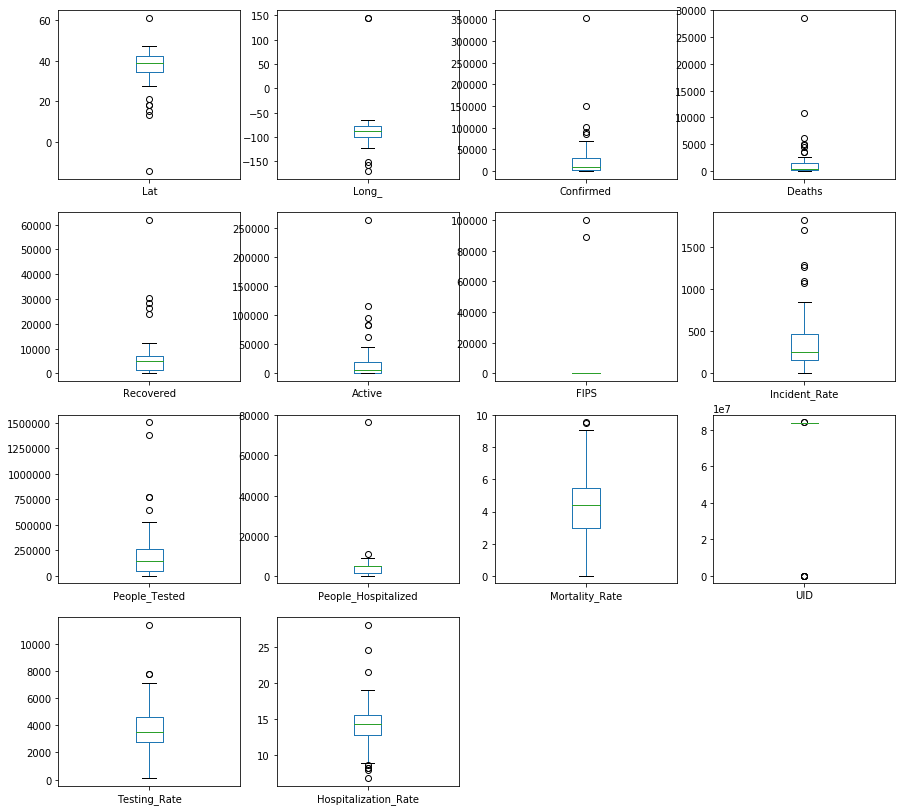

In [109]:
#checking for the outliers
Covid_df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,18))

In [110]:
#checking the skewness before removing the outliers
Covid_df.skew()

Lat                    -2.213092
Long_                   3.509241
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.483997
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [111]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder()
for col in Covid_df.columns:
    if col in Covid_df.columns:
        i = Covid_df.columns.get_loc(col)
        Covid_df.iloc[:,i] = Covid_df.apply(lambda i:le_x.fit_transform(i.astype(str)), axis=0, result_type='expand')
Covid_df.sample(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
8,8,0,0,29,24,52,28,25,32,1,52,42,18,20,11,4,42,9
45,45,0,0,38,17,7,43,0,8,35,3,2,4,24,43,4,0,2
9,9,0,0,56,56,38,0,37,37,55,37,24,18,0,55,4,37,9
42,42,0,0,49,10,29,11,10,16,33,54,0,25,21,41,4,6,22
48,48,0,0,18,38,16,27,4,43,38,27,34,6,5,46,4,45,29


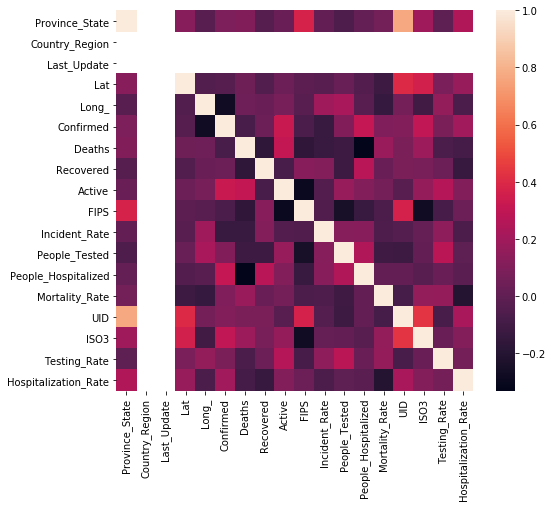

In [123]:
#checking for the correlation
corr_hmap=Covid_df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap)

In [112]:
#removing outliers
z_score=np.abs(zscore(Covid_df))
print(Covid_df.shape)
Covid_df_final=Covid_df.loc[(z_score<3).all(axis=1)]
print(Covid_df_final.shape)

(58, 18)
(0, 18)


In [113]:
Covid_df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [119]:
#Now separating input and output variable
x=Covid_df.drop(['Deaths','Lat','Long_','Recovered'],axis=1)
y=Covid_df['Deaths']
print(x.shape)
print(y.shape)

(58, 14)
(58,)


In [120]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.70244092e+00,  0.00000000e+00,  0.00000000e+00,
        -1.34403230e+00, -1.16482800e+00, -1.70244092e+00,
        -1.31802508e-01, -8.53731579e-01, -1.60587268e+00,
        -3.33297618e-01, -1.46350184e+00,  2.17198770e-01,
        -1.92958871e-01, -1.24203237e+00],
       [-1.64270615e+00,  0.00000000e+00,  0.00000000e+00,
         2.68806461e-01,  1.49336923e-01, -1.10509323e+00,
         1.09132476e+00,  4.33205381e-01,  1.16500010e-01,
        -1.11375229e+00, -1.40376707e+00,  2.17198770e-01,
         9.07855672e-01, -5.25237569e-01],
       [-1.58297138e+00,  0.00000000e+00,  0.00000000e+00,
        -1.70244092e+00, -1.70244092e+00,  1.22456277e+00,
        -1.72186796e+00, -1.46655870e+00,  1.16500010e-01,
        -1.53399711e+00, -1.70244092e+00, -5.38170286e+00,
        -1.53839887e+00, -5.25237569e-01],
       [-1.52323661e+00,  0.00000000e+00,  0.00000000e+00,
        -1.16482800e+00, -1.58297138e+00,  1.49336923e-01,
        -6.21053415e-01, -7.92448867e-01, -1.

In [128]:
#Machine Learning Models
models=[]
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [129]:
r2_scr_results = []
names = []
for name, model in models:
    print(name)
    max_r2_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",r2_scr)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr      
            final_r_state=r_state
    r2_scr_results.append(max_r2_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_r2_score)
    print()
    print()

LR
random state:  42  accuracy score:  -0.4808870139531176
random state:  43  accuracy score:  -2.436865257207095
random state:  44  accuracy score:  0.4387570307159335
random state:  45  accuracy score:  -3.262991523075147
random state:  46  accuracy score:  -1.064280949093129
random state:  47  accuracy score:  -1.102940045526252
random state:  48  accuracy score:  -1.3160262543240244
random state:  49  accuracy score:  0.776478904873144
random state:  50  accuracy score:  -0.7195292599241685
random state:  51  accuracy score:  -8.900110035257137
random state:  52  accuracy score:  0.4611350155182399
random state:  53  accuracy score:  -0.46635472814749535
random state:  54  accuracy score:  0.45146347466220615
random state:  55  accuracy score:  0.21378811141265142
random state:  56  accuracy score:  0.5254460626314877
random state:  57  accuracy score:  0.06804107893850608
random state:  58  accuracy score:  0.6284696862011176
random state:  59  accuracy score:  -2.4294320234926285

random state:  75  accuracy score:  -2.0334252619966904
random state:  76  accuracy score:  -2.562654462242563
random state:  77  accuracy score:  -2.948973719547286
random state:  78  accuracy score:  -0.8233258701404436
random state:  79  accuracy score:  -0.642524452724732
random state:  80  accuracy score:  -1.7173539518900345
random state:  81  accuracy score:  -8.48108684070325
random state:  82  accuracy score:  -3.8565145684442
random state:  83  accuracy score:  -0.5575472729260029
random state:  84  accuracy score:  -3.359907670454546
random state:  85  accuracy score:  -0.4588665447897622
random state:  86  accuracy score:  -0.41893817076645434
random state:  87  accuracy score:  -3.79006968641115
random state:  88  accuracy score:  -2.586744087239768
random state:  89  accuracy score:  -3.4123547205858946
random state:  90  accuracy score:  -1.0319084888621308
random state:  91  accuracy score:  -0.6699915875495734
random state:  92  accuracy score:  -1.1830830388692584
ran

In [130]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=2, scoring="r2")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  -1.074104663129625
Cross Validation Score(Std):  0.06508071172689234

Model name:  KNN
Cross Validation Score(Mean):  -1.3588539946460703
Cross Validation Score(Std):  0.5527906186558206

Model name:  DT
Cross Validation Score(Mean):  -1.5161325530688654
Cross Validation Score(Std):  0.15601857429249955

Model name:  GNB
Cross Validation Score(Mean):  -0.48924992772889586
Cross Validation Score(Std):  0.011492462768505907



In [131]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':r2_scr_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LinearRegression(copy_X=True, fit_interce...",77.647890,-107.410466
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",40.906178,-135.885399
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",40.700430,-151.613255
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",15.841964,-48.924993


In [140]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.10)
model_name=LinearRegression()
model_name.fit(x_train,y_train)
y_pred_model=model_name.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 score: ",r2_scr)
print("mean squared error: ",mse)
print(y_pred_model)

r2 score:  -0.2589182968929804
mean squared error:  273.5
[22.46895557 43.12453359 21.26436512 36.45504881 19.08519649 36.92307926]


In [142]:
#saving the model as pickle in a file
pickle.dump(model_name,open('LR_Covid_data.pkl','wb'))

In [143]:
#loading the model for testing
loaded_model=pickle.load(open('LR_Covid_data.pkl','rb'))
loaded_model.predict(x_test)

array([22.46895557, 43.12453359, 21.26436512, 36.45504881, 19.08519649,
       36.92307926])